# Training

**Goal:** To derive predictions from the dataset using the following models:
- XGBoost
- Linear Regression
- Logistic Regression
- Support Vector Machines (SVM)

**Load Data**

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("../data/knight_hacks_dues_processed.csv")

# Set features and target
drop = ["y_paid_dues", "school_grouped", "major_grouped", "level_grouped"]

X = data.drop(columns=drop)
y = data["y_paid_dues"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
X_train.dtypes

member_days_since_join            int64
events_attended_year              int64
distinct_event_days_year          int64
attendance_streak_weeks           int64
n_gbm_year                        int64
n_social_year                     int64
n_hello_world_year                int64
n_sponsorship_year                int64
n_tech_exploration_year           int64
n_class_support_year              int64
class_support_ratio             float64
n_workshop_year                   int64
n_ops_year                        int64
ops_ratio                       float64
n_collabs_year                    int64
feedback_count_year               int64
avg_event_rating_given          float64
left_any_feedback                 int64
has_gone_to_hackathon             int64
discord_member                    int64
discord_days_since_join         float64
has_role_ops                      int64
discord_msgs_year                 int64
discord_active_days_year          int64
discord_channels_posted_year      int64


**XGBoost**

[0]	train-rmse:0.40338	val-rmse:0.42527
[1]	train-rmse:0.35780	val-rmse:0.41220
[2]	train-rmse:0.32000	val-rmse:0.40114
[3]	train-rmse:0.28898	val-rmse:0.39804
[4]	train-rmse:0.26440	val-rmse:0.39284
[5]	train-rmse:0.25104	val-rmse:0.39356
[6]	train-rmse:0.23740	val-rmse:0.39065
[7]	train-rmse:0.22711	val-rmse:0.39223
[8]	train-rmse:0.21647	val-rmse:0.39105
[9]	train-rmse:0.20697	val-rmse:0.38948


/home/luke/GitHub/final-project/.venv/lib/python3.11/site-packages/xgboost/core.py:771: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (210, 33) and arg 1 with shape (210,).

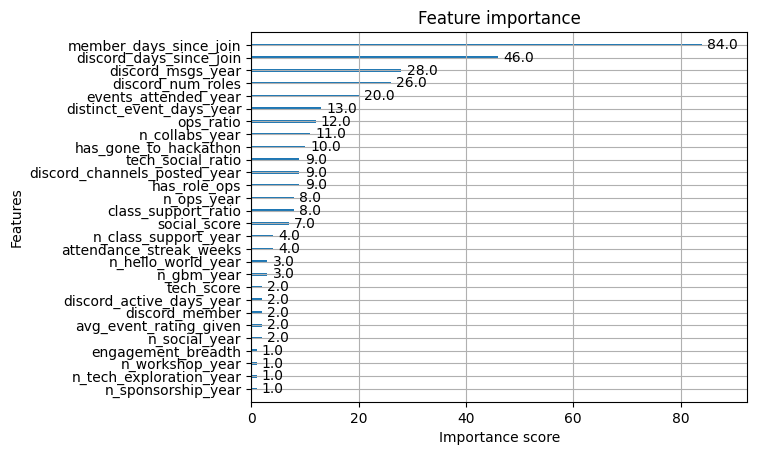

In [ ]:
import xgboost as xgb

dm_train = xgb.DMatrix(X_train, label=y_train)
dm_val = xgb.DMatrix(X_val, label=y_val)
dm_test = xgb.DMatrix(X_test, label=y_test)

rounds = 10
params = {}

booster = xgb.train(params, dm_train, rounds, [(dm_train, "train"), (dm_val, "val")])
pred = booster.predict(dm_test)

xgb.plot_importance(booster)